<a href="https://colab.research.google.com/github/Tongkat4/MY-ANALYSIS/blob/main/bollinger_band.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DESCRIPTION :BOLLINGER BAND TO DETERMINE WHEN TO BUY AND SELL

#import the library
!pip install pandas-datareader
import pandas_datareader.data as web
import datetime

import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd



In [ ]:
# load data
start = datetime.datetime(2020,1,2)
end = datetime.datetime.now()
stockTicker = '6888.KL' 


In [ ]:
df= web.DataReader(stockTicker,'yahoo',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,4.18,4.13,4.14,4.15,4128600.0,4.060905
2020-01-03,4.20,4.16,4.17,4.20,9316900.0,4.109831
2020-01-06,4.20,4.13,4.20,4.16,1333400.0,4.070690
2020-01-07,4.39,4.15,4.16,4.36,2999100.0,4.266397
2020-01-08,4.28,4.16,4.27,4.21,3508800.0,4.119617
...,...,...,...,...,...,...
2021-05-07,3.79,3.66,3.79,3.68,1340700.0,3.680000
2021-05-10,3.72,3.63,3.68,3.66,890200.0,3.660000
2021-05-11,3.68,3.62,3.65,3.66,1281900.0,3.660000


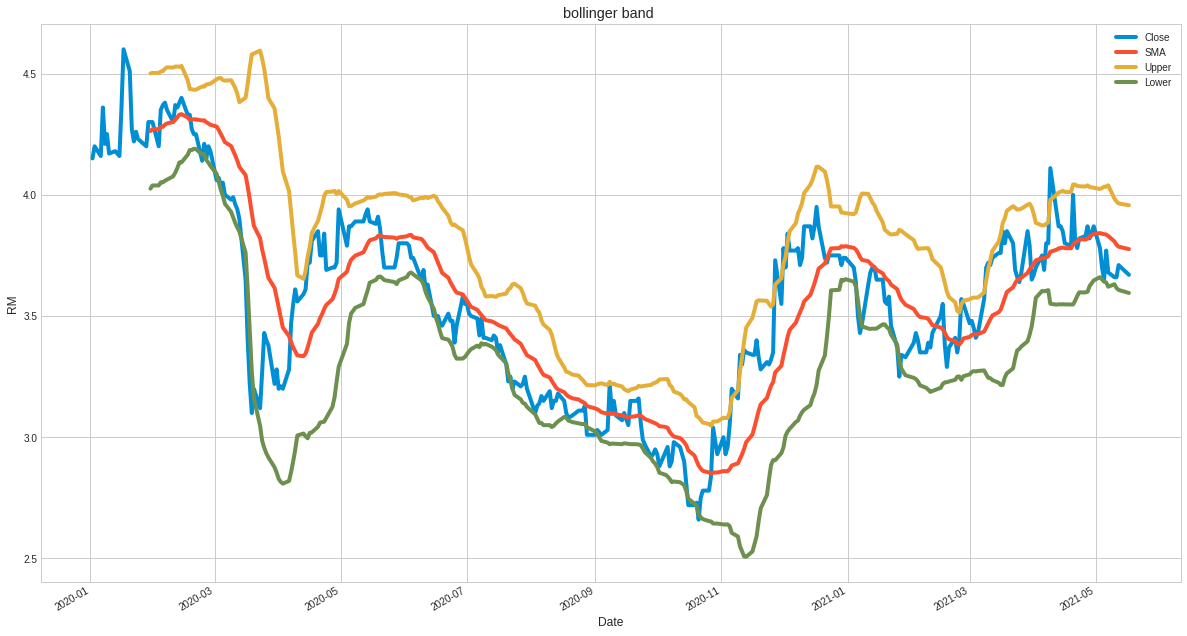

In [ ]:
#calculate the simple moving average, standard deviation, upper band and the lower band
#get the time period (20 day)

period=20

#calculate the simple moving  average (SMA)
df['SMA']= df['Close'].rolling(window=period).mean()
#get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std()
#calculate the upper b.b
df['Upper'] = df['SMA'] + (df['STD'] * 2)
#calculate the lower b.b
df['Lower']=df['SMA'] - (df['STD'] * 2)
#create a list of columns to keep 
column_list= ['Close','SMA','Upper','Lower']
#plot th data
df[column_list].plot(figsize=(18.2,11.4))
plt.title('bollinger band ')
plt.ylabel('RM')
plt.show()

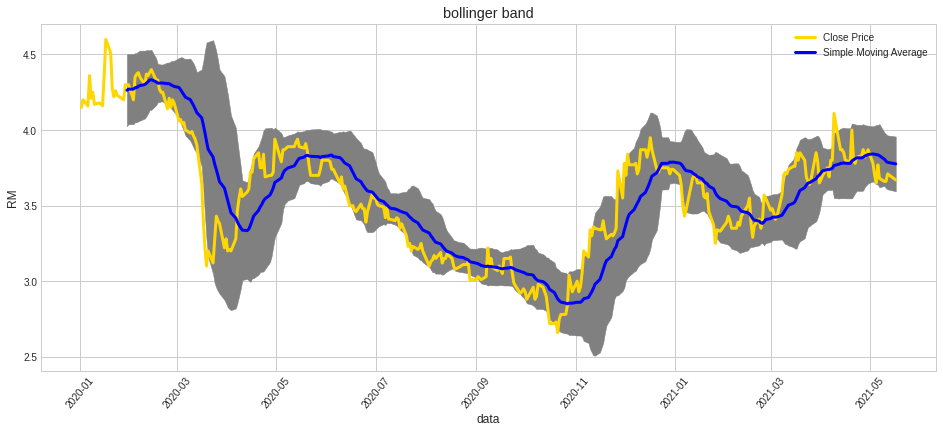

In [ ]:
#plot and shade the area between the two bb
#get the figure and the figure size
fig = plt.figure(figsize=(14.3,6.4))
#add the subplot
ax= fig.add_subplot(1,1,1)
#get the index values of the data frame
x_axis = df.index
#plot and shade the area between the upper and the lower band grey
ax.fill_between(x_axis, df['Upper'],df['Lower'], color = 'grey')
#plot the closing price and the moving average
ax.plot(x_axis, df['Close'], color = 'gold', lw = 3, label ='Close Price')
ax.plot(x_axis, df['SMA'], color = 'blue', lw = 3, label ='Simple Moving Average')
#set the title and show the image
ax.set_title('bollinger band')
ax.set_xlabel('data')
ax.set_ylabel('RM')
plt.xticks(rotation = 50)
ax.legend()
plt.show()

In [ ]:
#create the dataframe 
new_df=df[period-1:]
new_df

,High,Low,Open,Close,Volume,Adj Close,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2020-01-30,4.33,4.26,4.30,4.30,4175200.0,4.207685,4.2630,0.118814,4.500629,4.025371
2020-01-31,4.31,4.22,4.26,4.30,7125300.0,4.207685,4.2705,0.116007,4.502514,4.038486
2020-02-03,4.28,4.18,4.25,4.20,4380800.0,4.109831,4.2705,0.116007,4.502514,4.038486
2020-02-04,4.39,4.21,4.21,4.35,3580900.0,4.256611,4.2800,0.114248,4.508496,4.051504
2020-02-05,4.43,4.28,4.38,4.37,8033700.0,4.276182,4.2805,0.114638,4.509776,4.051224
...,...,...,...,...,...,...,...,...,...,...
2021-05-07,3.79,3.66,3.79,3.68,1340700.0,3.680000,3.8300,0.104529,4.039058,3.620942
2021-05-10,3.72,3.63,3.68,3.66,890200.0,3.660000,3.8075,0.088251,3.984001,3.630999
2021-05-11,3.68,3.62,3.65,3.66,1281900.0,3.660000,3.7940,0.089172,3.972343,3.615657


In [ ]:
#create a function to get the buy and sell signals

def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
   if data['Close'][i] > data['Upper'][i]: # then you should sell
     buy_signal.append(np.nan)
     sell_signal.append(data['Close'][i])
   elif data['Close'][i] < data['Lower'][i]: # then you should buy
     buy_signal.append(data['Close'][i])
     sell_signal.append(np.nan)
   else: 
     buy_signal.append(np.nan)
     sell_signal.append(np.nan)


  return (buy_signal, sell_signal)  

In [ ]:
# create two new column
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


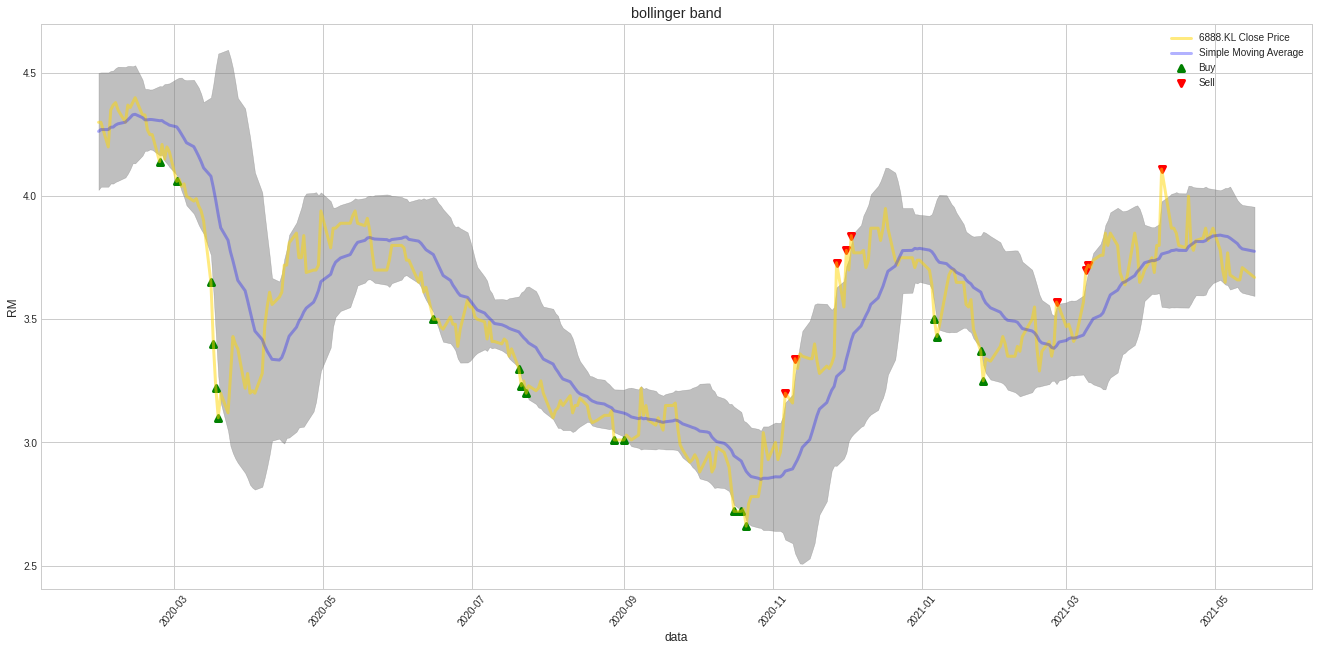

In [ ]:
#plot all of the data
plt.style.use('seaborn-whitegrid')
#get the figure and the figure size
fig = plt.figure(figsize=(20.3,10.4))
#add the subplot
ax= fig.add_subplot(1,1,1)
#get the index values of the data frame
x_axis = new_df.index
#plot and shade the area between the upper and the lower band grey
ax.fill_between(x_axis, new_df['Upper'],new_df['Lower'], color = 'grey',alpha=0.5)
#plot the closing price and the moving average
ax.plot(x_axis, new_df['Close'], color = 'gold', lw = 3, label ='6888.KL Close Price',alpha=0.5)
ax.plot(x_axis, new_df['SMA'], color = 'blue', lw = 3, label ='Simple Moving Average',alpha=0.3)
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw=3, label='Buy', marker='^',alpha=1)
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw=3, label='Sell', marker='v',alpha=1)
#set the title and show the image
ax.set_title('bollinger band')
ax.set_xlabel('data')
ax.set_ylabel('RM')
plt.xticks(rotation = 50)
ax.legend()
plt.show()